Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

Librerías

In [51]:
# Tratamiento de datos
import pandas as pd
import numpy as np
pd.set_option('display.max.column',None)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,  balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy.stats import shapiro

Datos

In [39]:
df=pd.read_csv('/Users/itziarc/Desktop/DS_PT_09_2023-2/Machine_Learning/Prueba_Tecnica_Nivel/data/train.csv')
test_df=pd.read_csv('/Users/itziarc/Desktop/DS_PT_09_2023-2/Machine_Learning/Prueba_Tecnica_Nivel/data/test.csv')

Primera exploración

In [9]:
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,0.009,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,0.820,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,0.000,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,0.004,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [10]:
df.tail()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,0.27,0.004,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,0.10,0.001,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,0.00,0.007,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,0.08,0.008,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0
5596,3294,0.09,10.81,0.69,2.67,0.060,5.97,0.02,1.15,0.53,0.66,0.660,0.088,8.15,1.72,0.001,36.53,5.66,0.00,0.17,0.02,0


In [11]:
df.shape

(5597, 22)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

In [16]:
df.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,0.324309,0.329693,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,0.328954,0.377353,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,0.002000,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,0.230000,0.008000,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,0.610000,0.700000,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


Conclusiones del primer analisis:

-5597 obeservaciones y 22 columnas

-La target es binaria 0-1, por lo que emplearemos algoritmos de clasificación

-Todas las variables son continuas expecto la target e Id(identificación de elementos tratados)

-No nulos, no duplicados, dataframe completo

EDA

In [17]:
#Función para visualización

def grafico_histbox(column, df):
    # Crear figura y ejes de subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico de distribución (histograma)
    sns.histplot(df[column], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de la variable {column}')
    axs[0].set_xlabel(f'Valores de {column}')
    axs[0].set_ylabel('Frecuencia')

    # Gráfico de análisis univariante (boxplot)
    mean = df[column].mean()
    median = df[column].median()
    sns.boxplot(x=df[column], ax=axs[1])
    axs[1].axvline(mean, color='g', linestyle='-', label=f'Mean={mean:.1f}')
    axs[1].axvline(median, color='r', linestyle='-', label=f'Median={median:.1f}')
    axs[1].legend()
    axs[1].set_title(f'Análisis Univariante de {column}')
    axs[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

def grafico_countplot(column,df):

    custom_palette = sns.color_palette("husl", len(df[column].unique()))
    sns.countplot(x=column, hue=column, data=df, palette=custom_palette, stat='percent')

    return plt.show()


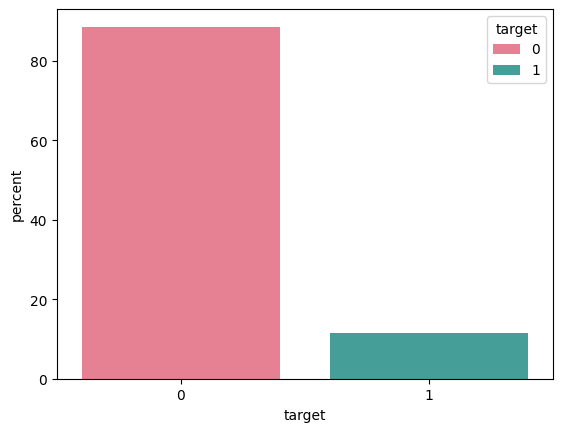

In [18]:
grafico_countplot('target',df)

In [20]:
df['target'].value_counts()

target
0    4957
1     640
Name: count, dtype: int64

Tenemos los datos de la target muy desbalanceados

In [21]:
df.columns

Index(['ID', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20', 'target'],
      dtype='object')

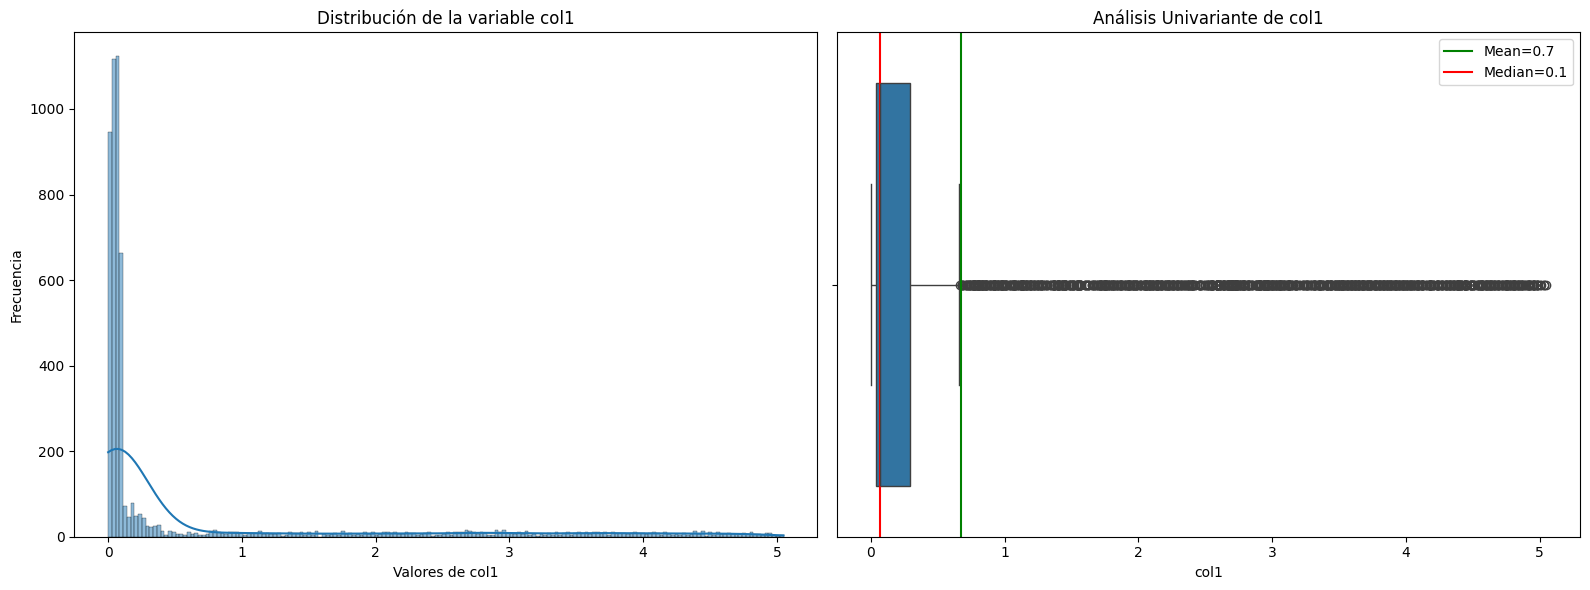

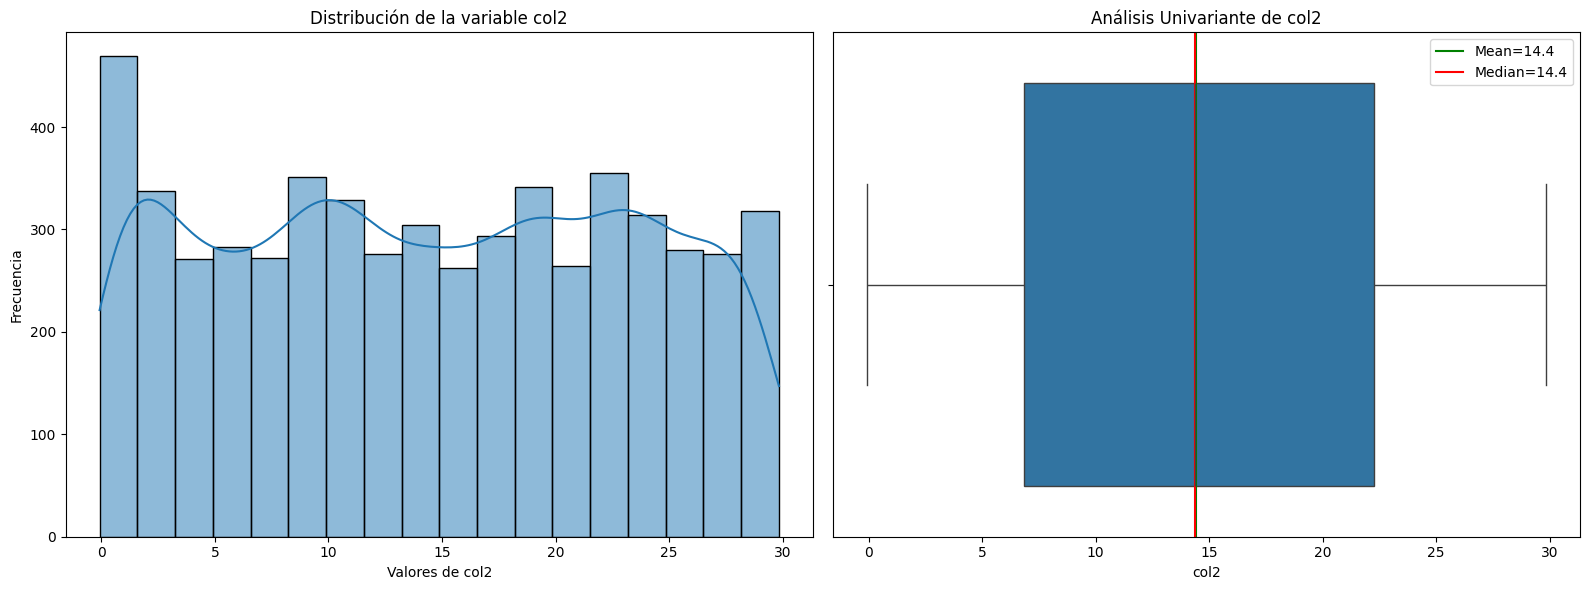

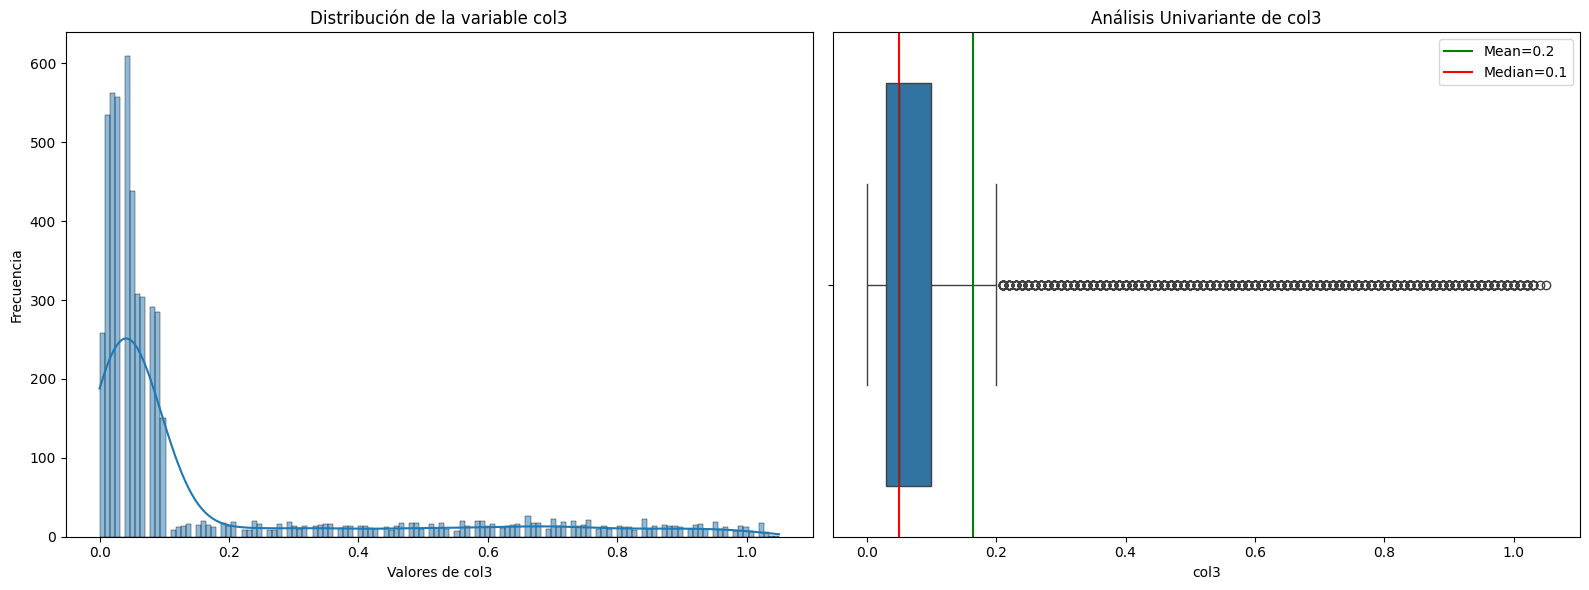

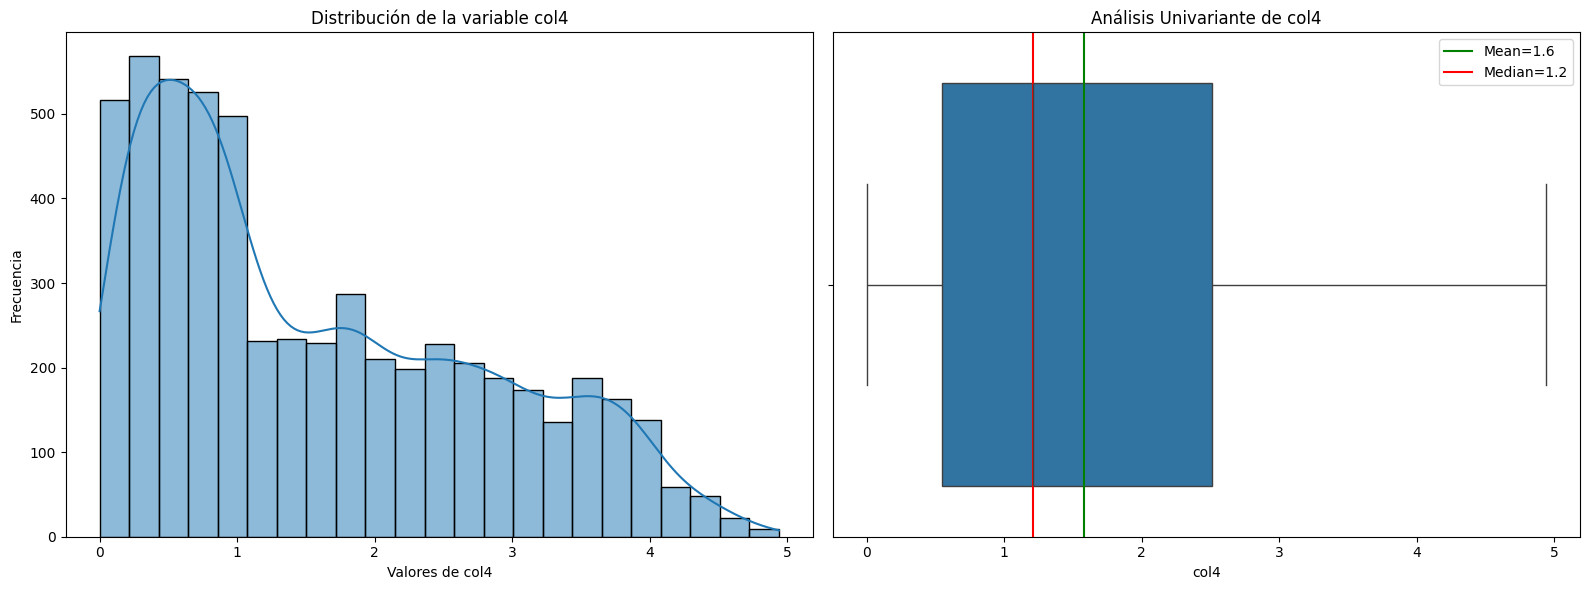

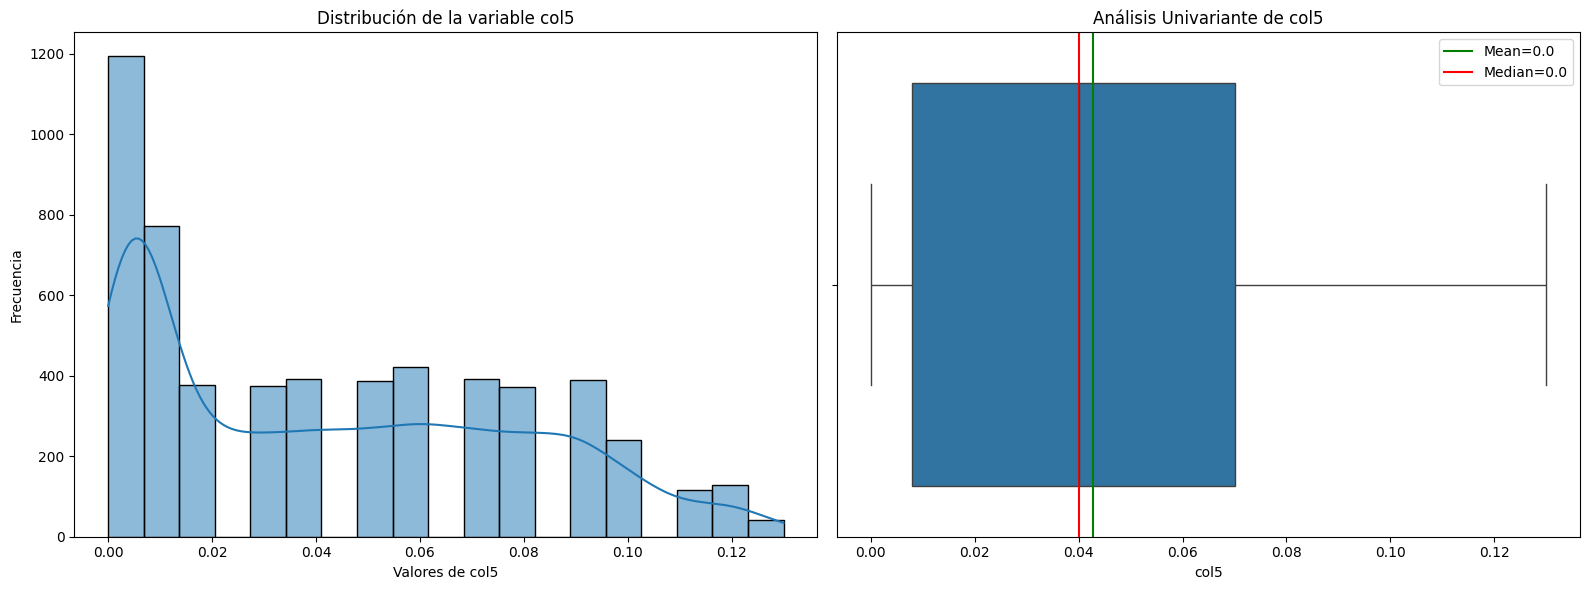

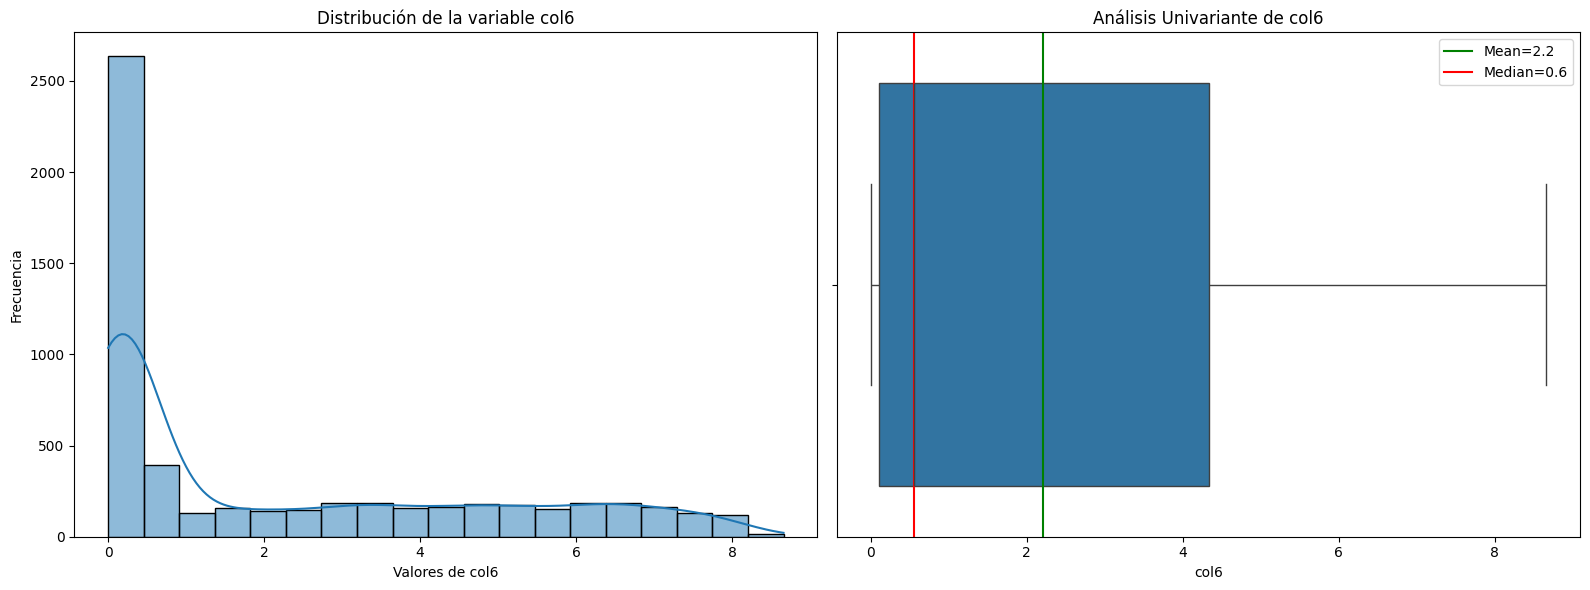

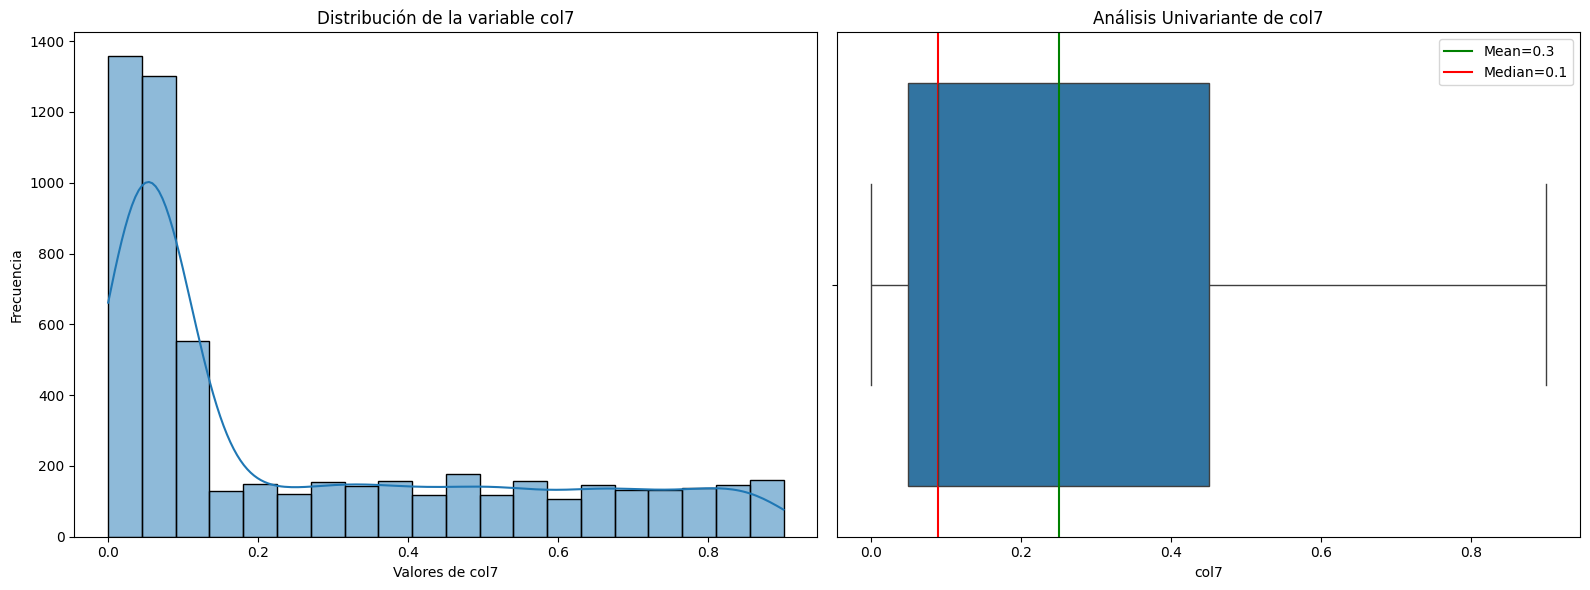

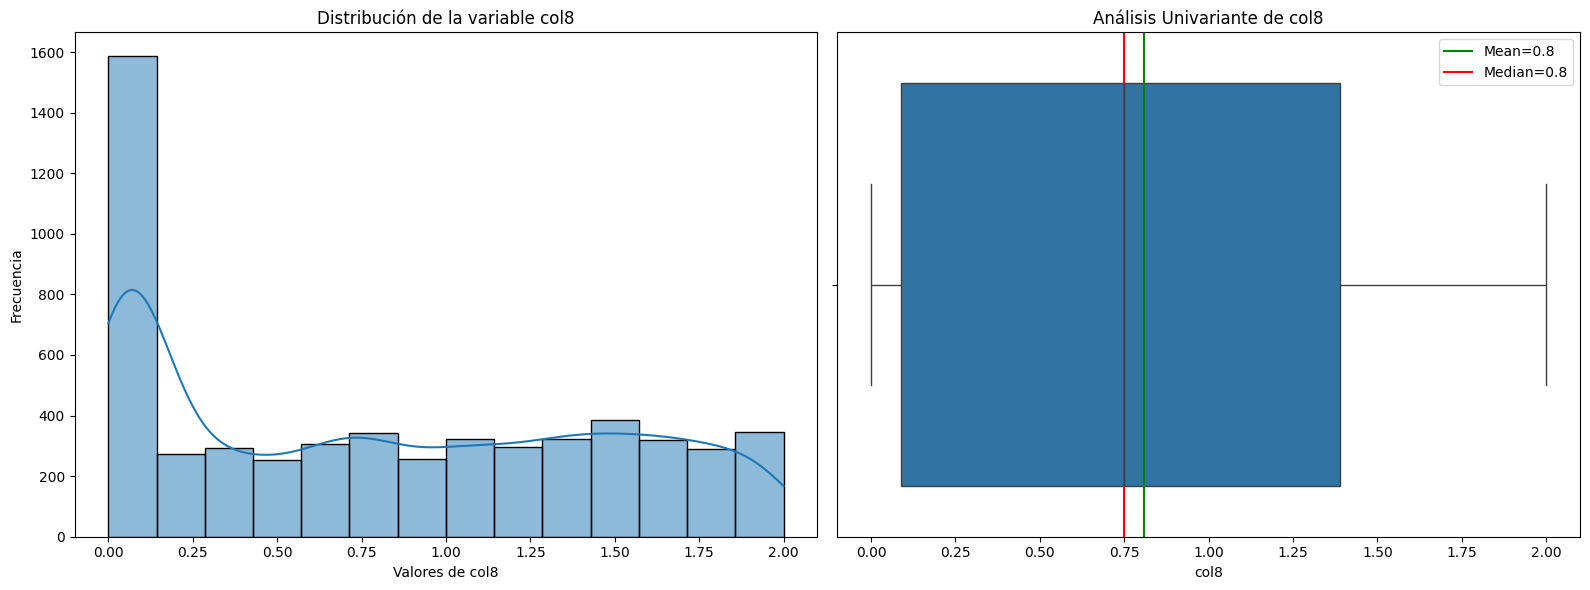

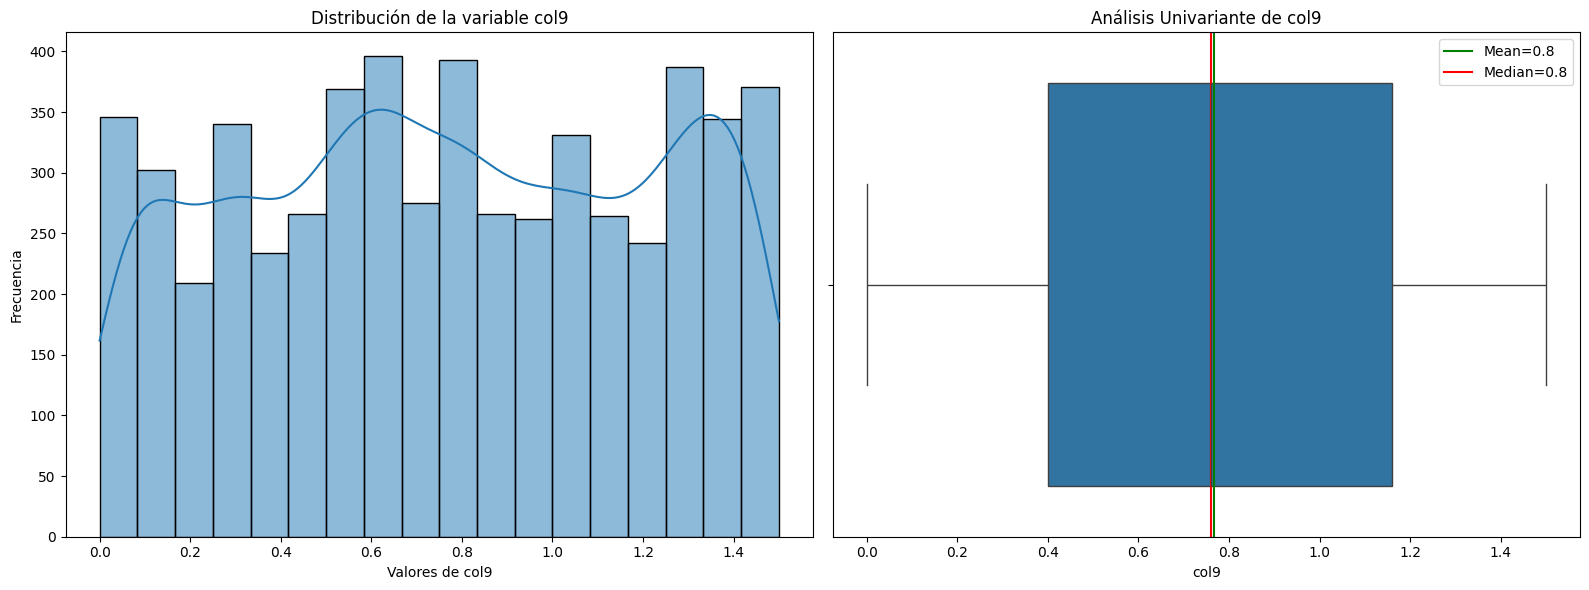

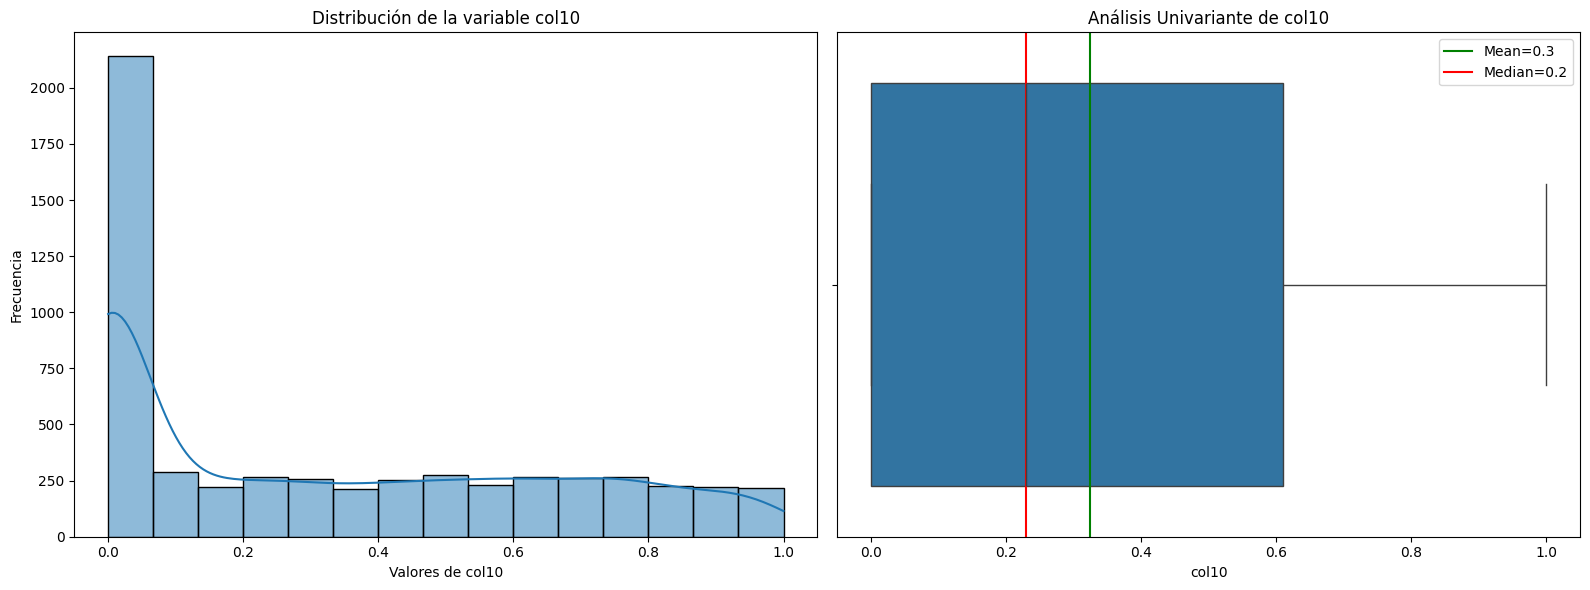

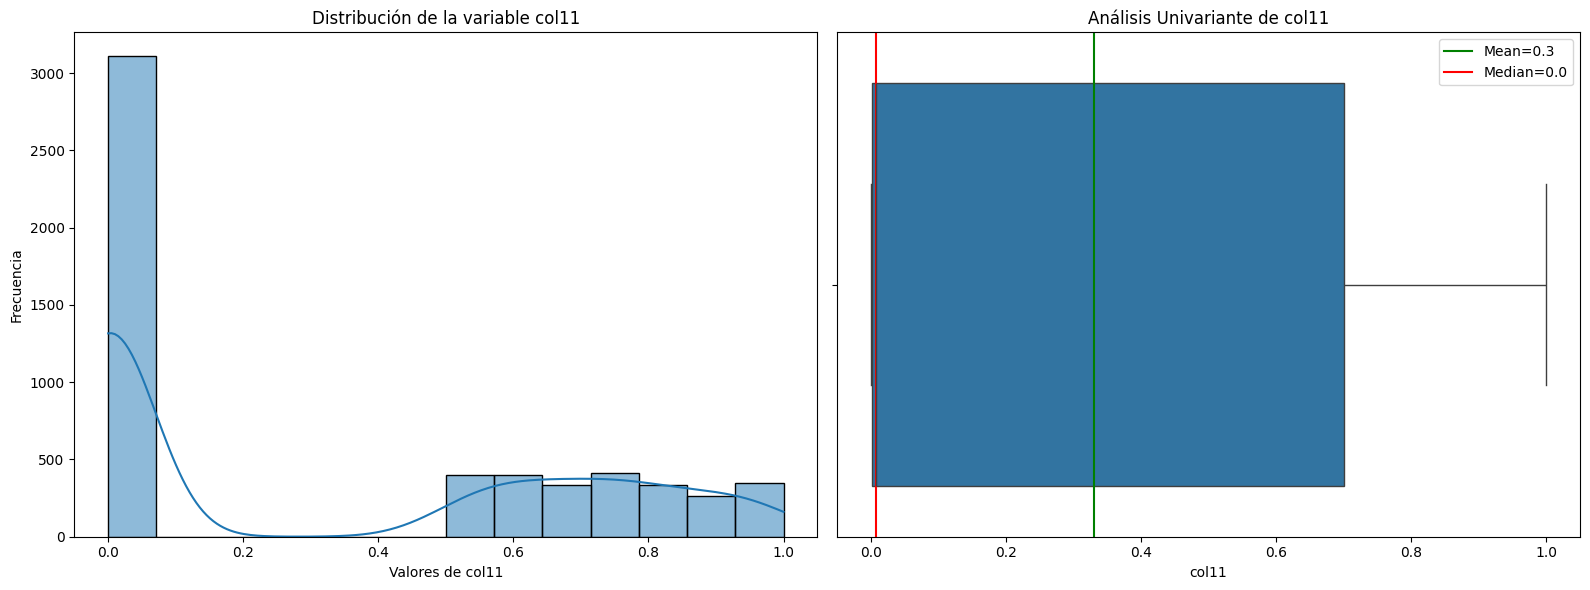

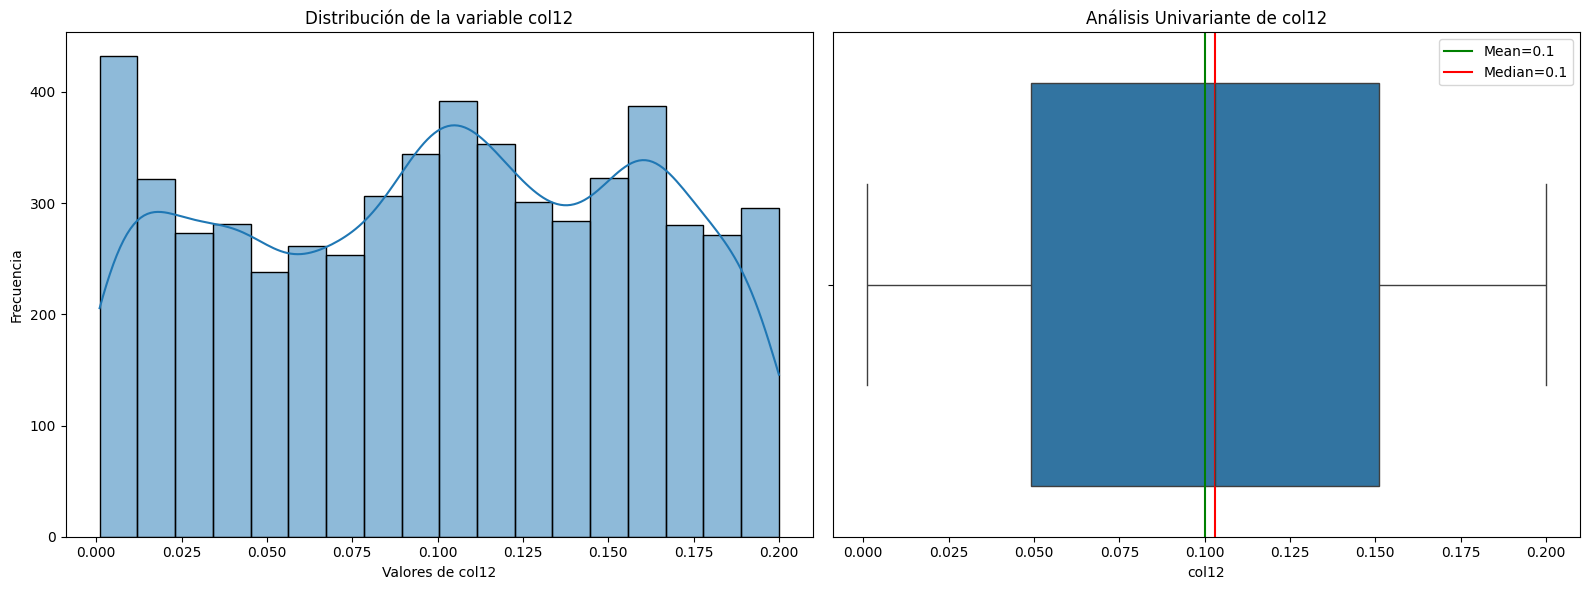

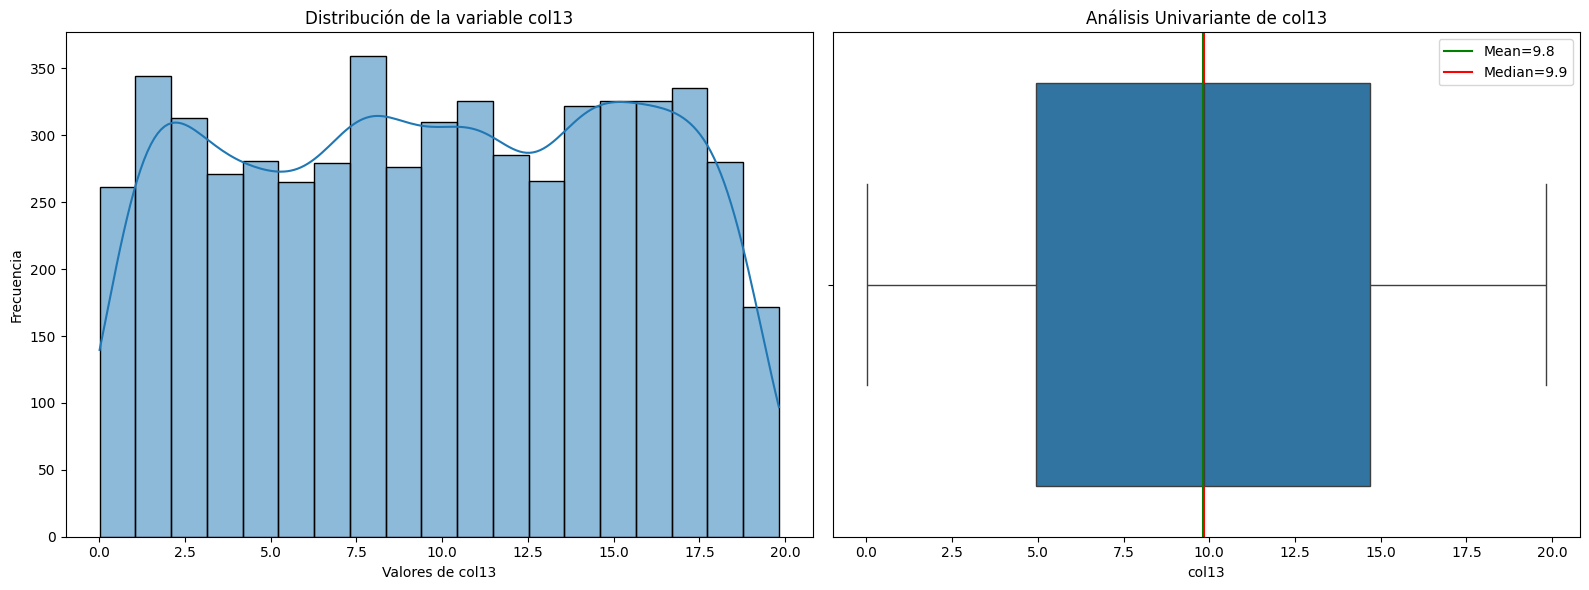

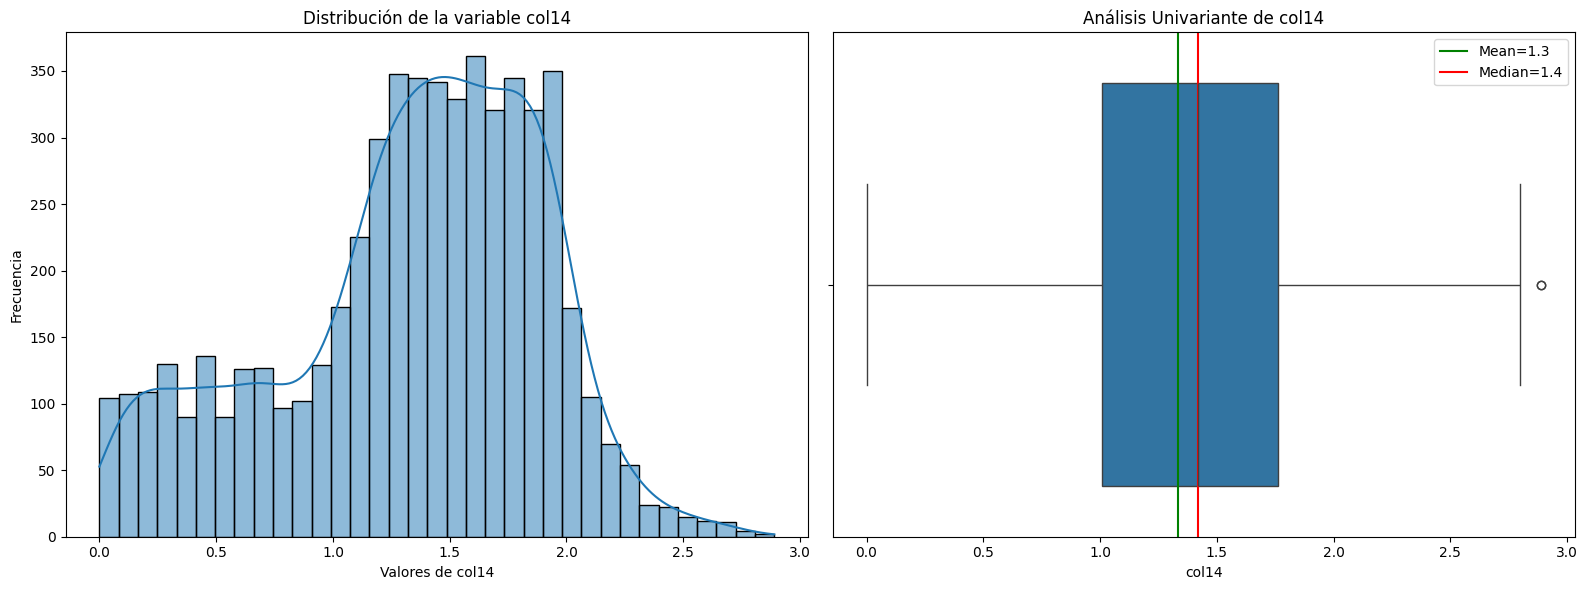

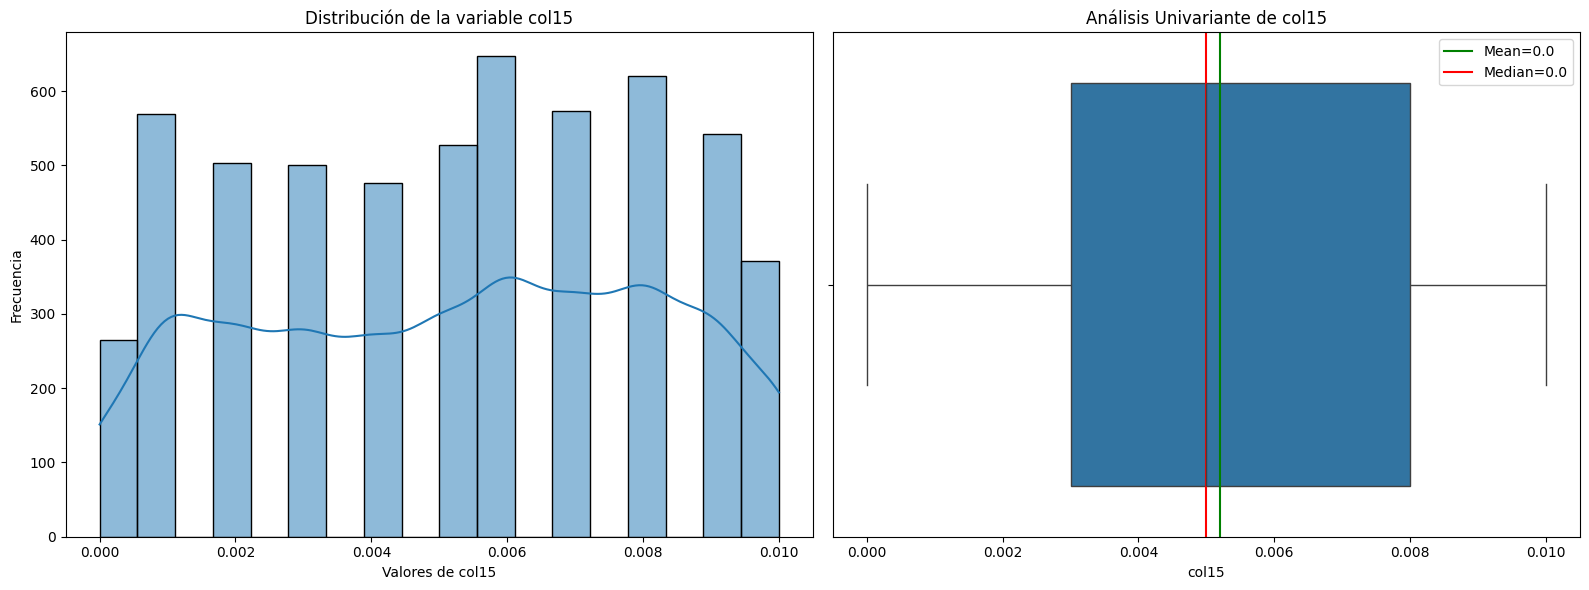

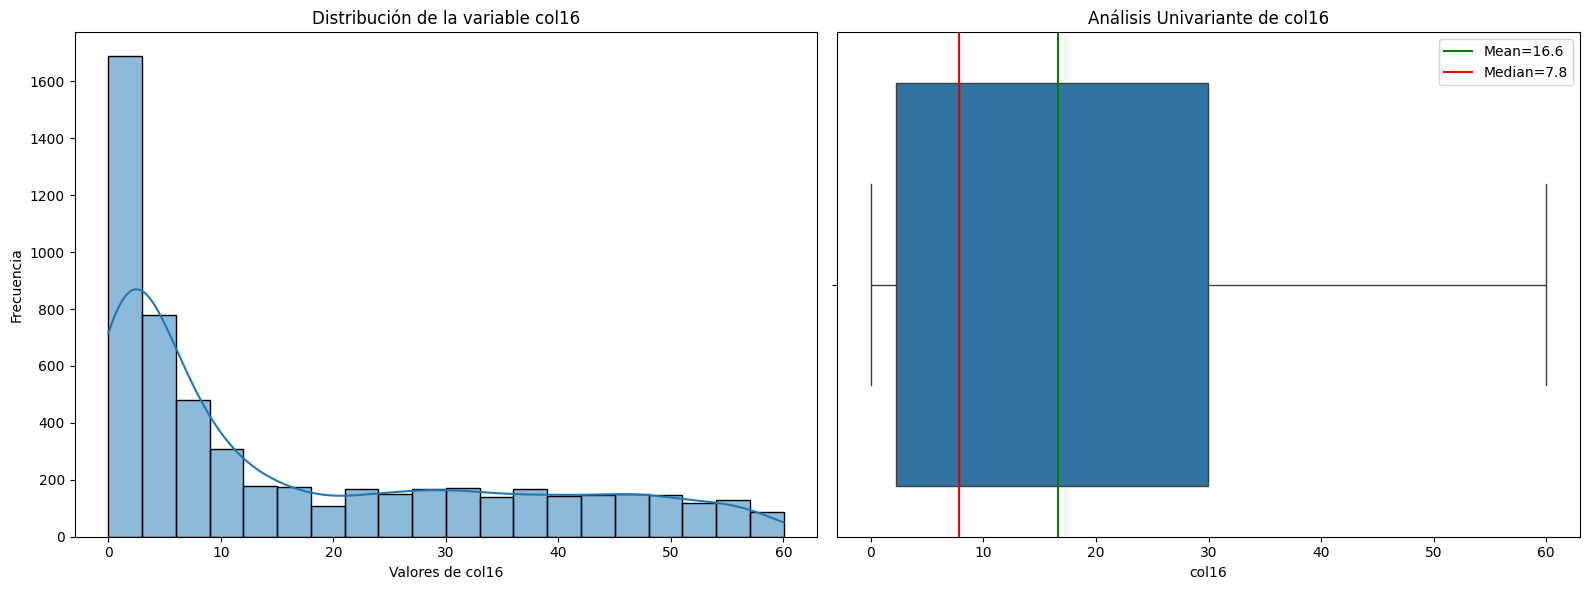

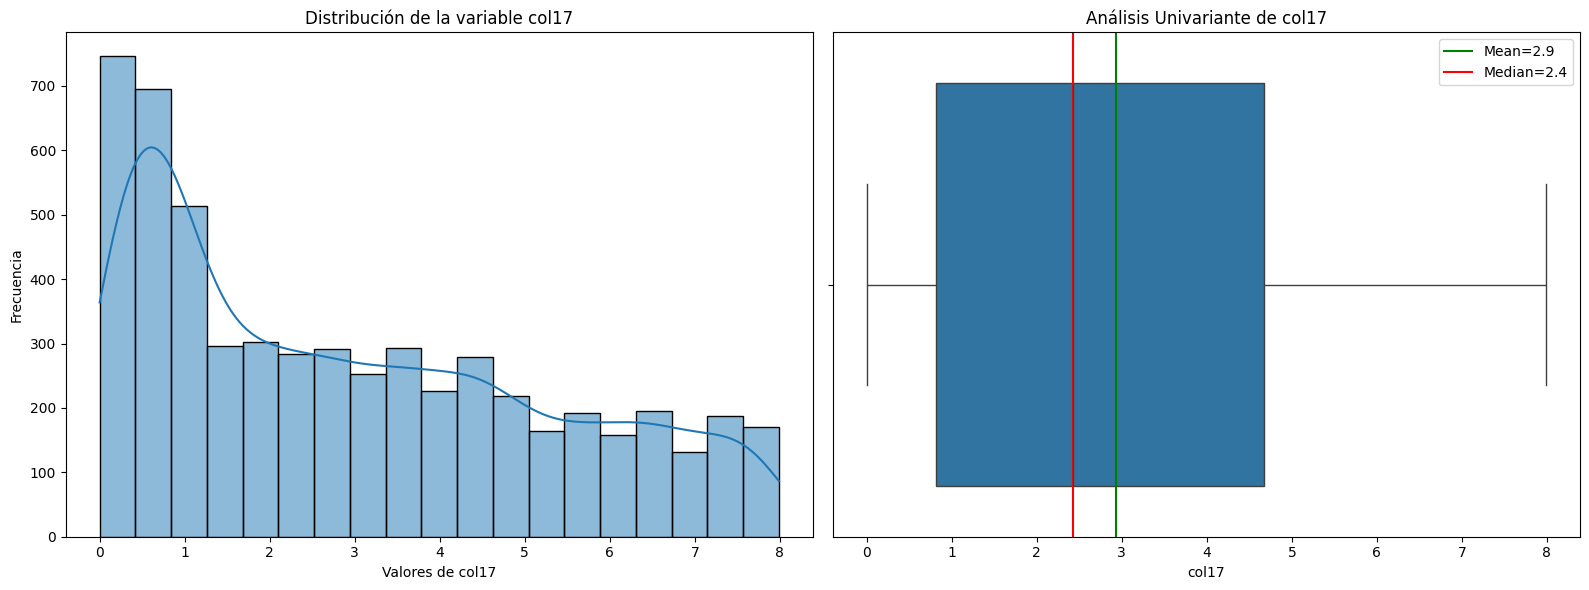

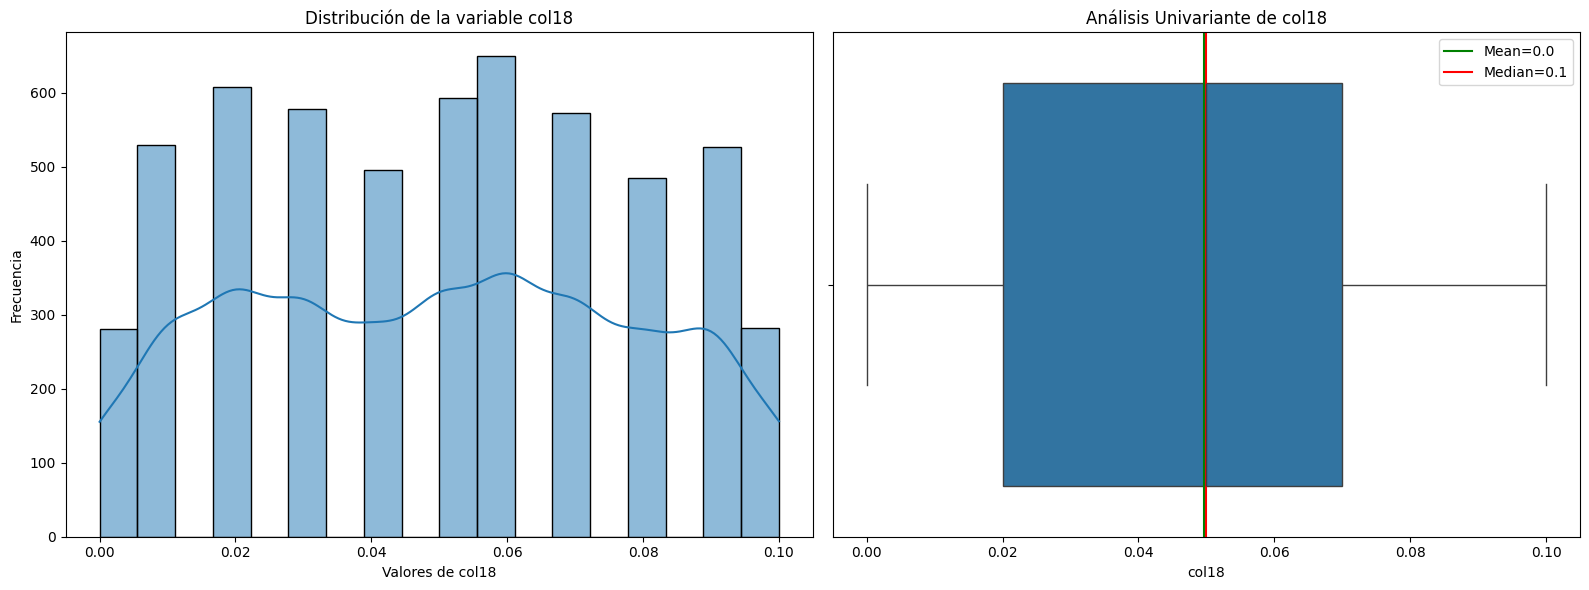

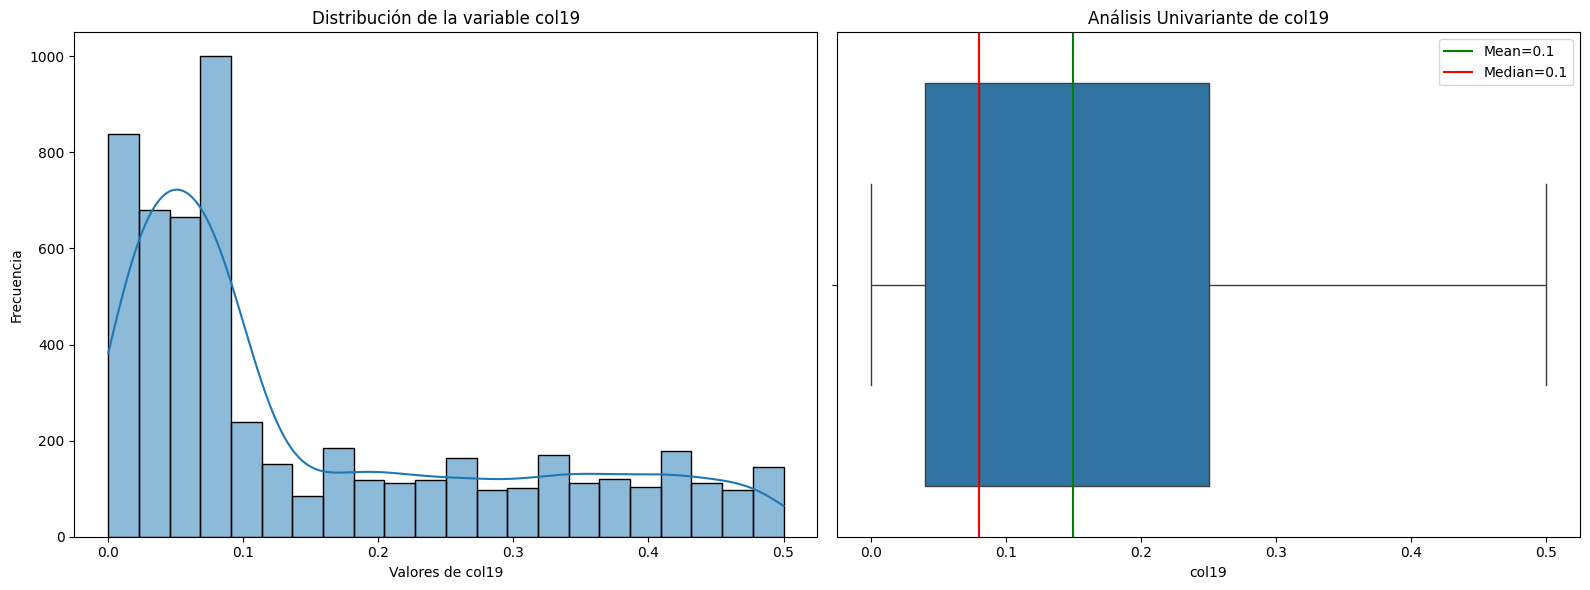

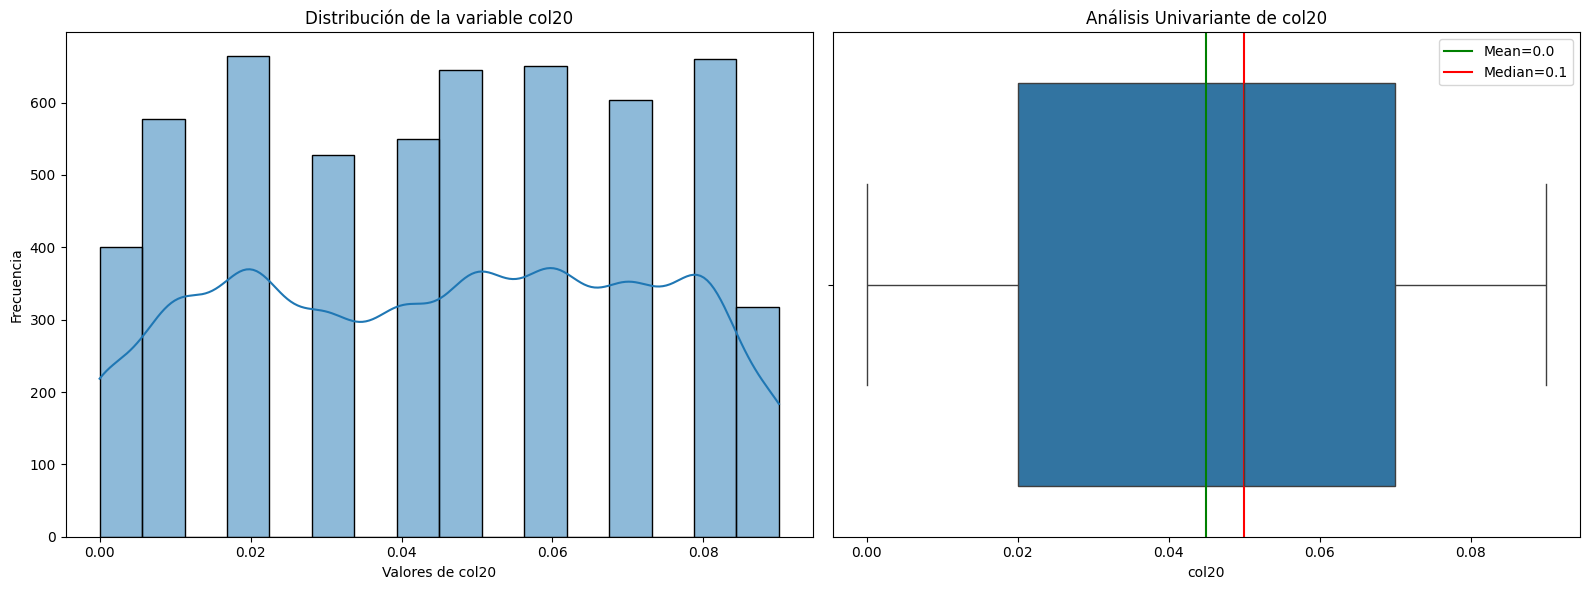

In [23]:
cols= ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20']
for columna in cols:
    grafico_histbox(columna, df)

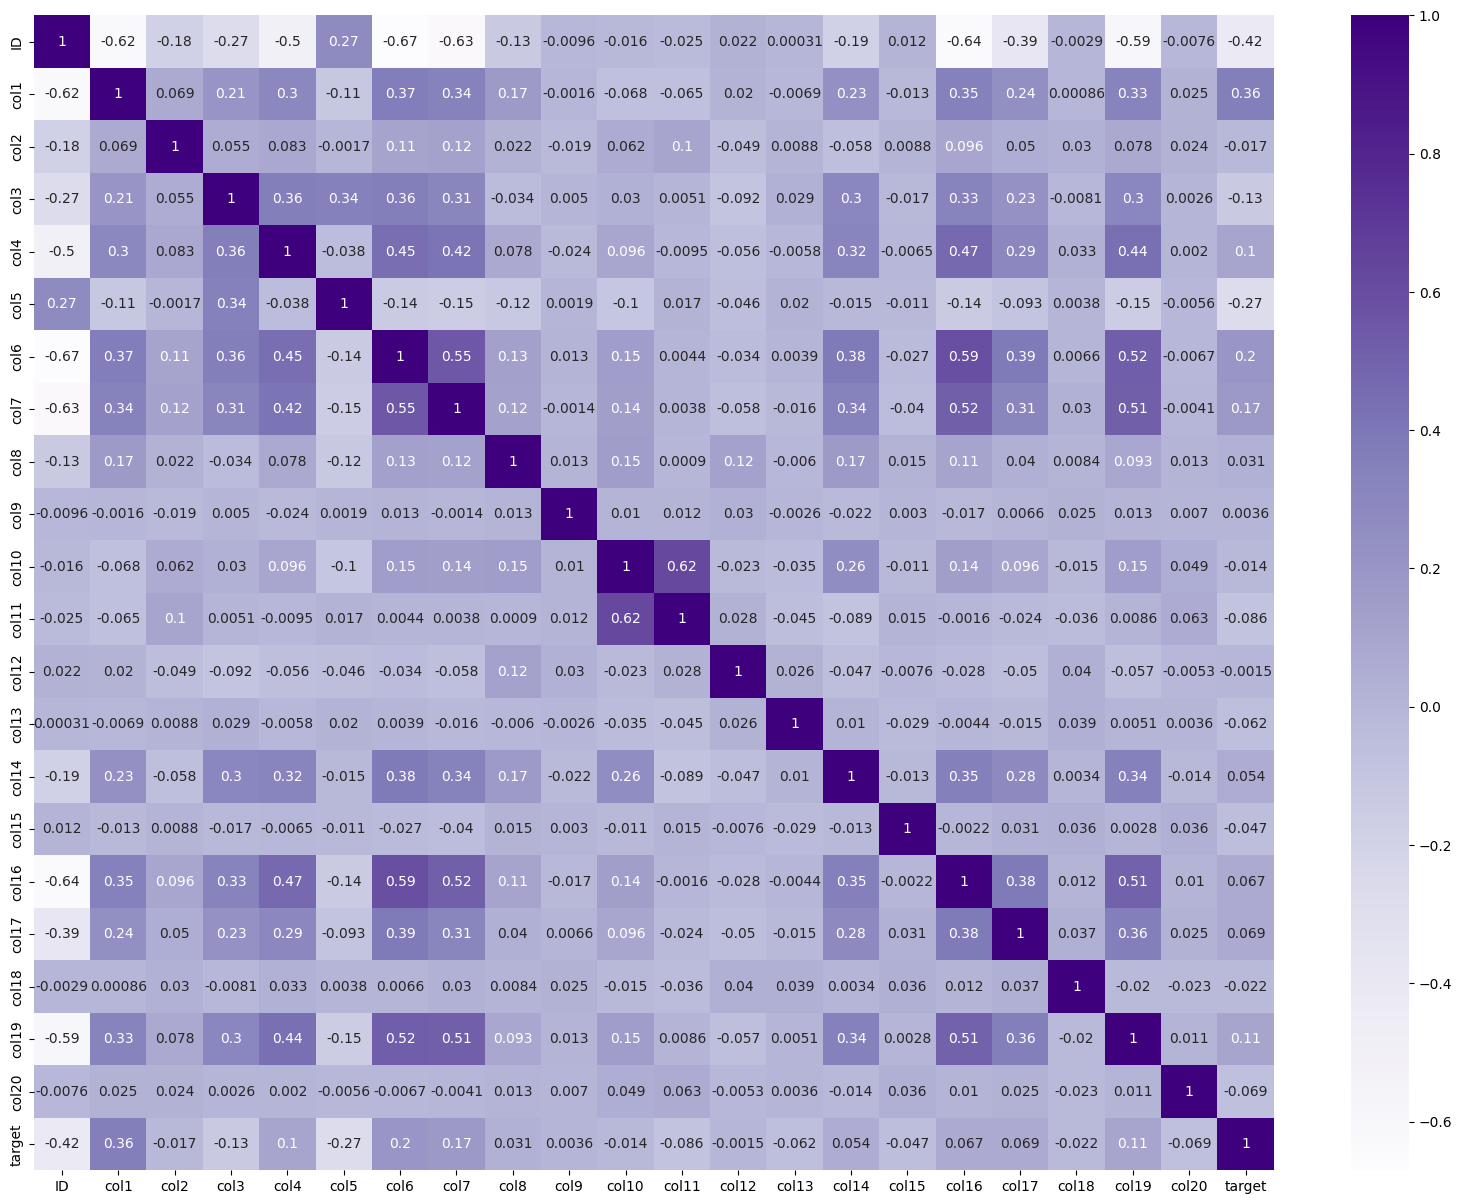

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='Purples');

In [29]:

def plot_numericas(numericas, df):
    num_plots = len(numericas)
    num_cols = 1 
    num_rows = (num_plots + num_cols - 1) // num_cols

    colors = sns.color_palette("husl", len(df['target'].unique()))

    plt.figure(figsize=(15, 5*num_rows))
    
    for i, numerical_column in enumerate(numericas, start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(x='target',hue='target', y=numerical_column, data=df, palette=dict(zip(df['target'].unique(), colors)))
        plt.xlabel('target')
        plt.ylabel(f'{numerical_column}')
        plt.title(f'{numerical_column} vs "target"')

    plt.tight_layout()
    plt.show()


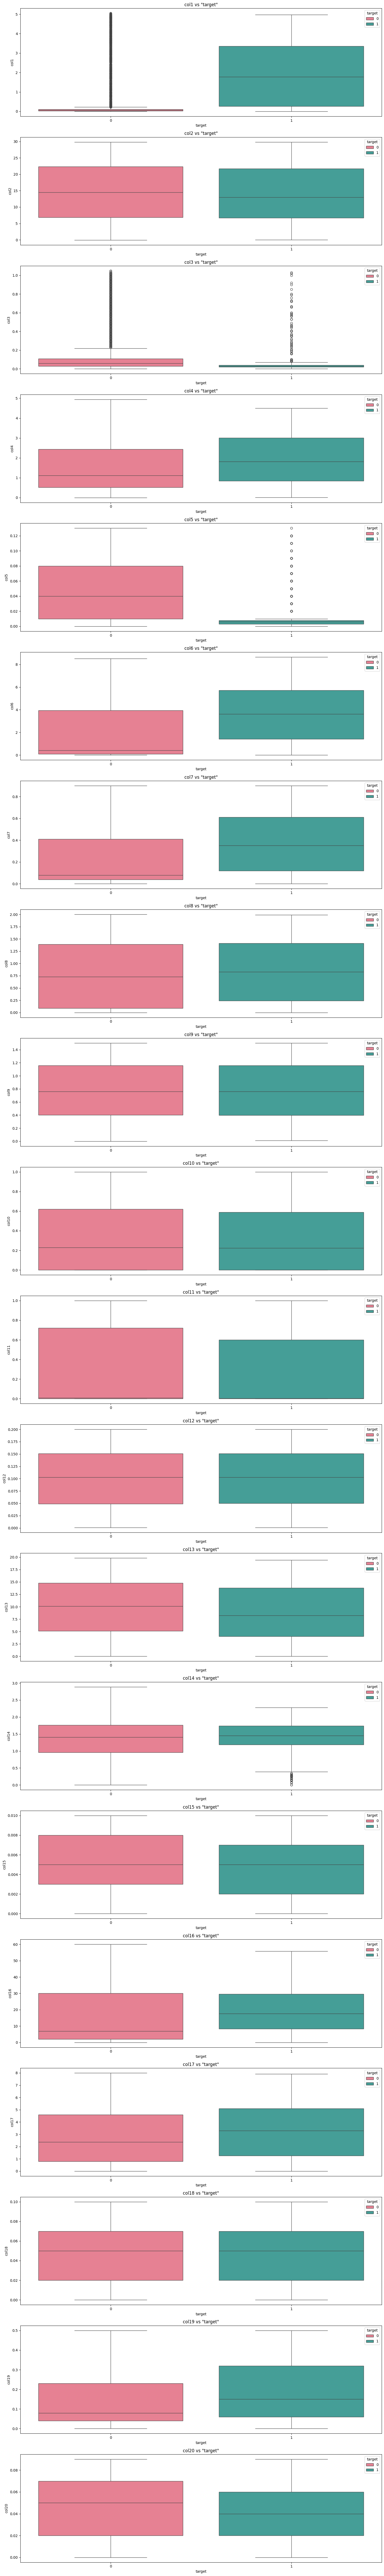

In [31]:
cols= ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20']
plot_numericas(cols,df)

División

In [41]:
#División df---> train y validation
train, val = train_test_split(df, test_size=0.2, random_state=42)

X_train = df.drop(['target','ID'], axis=1)
y_train = df['target']

X_val = val.drop(['target','ID'], axis=1)
y_val = val['target']

#Borramos ID en test_df
X_test=test_df.drop(['ID'], axis=1)

In [36]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(5597, 20)
(1120, 20)
(5597,)
(1120,)


Preprocesado

In [43]:
sca = MinMaxScaler()
X_train_scaled = sca.fit_transform(X_train)
X_val_scaled = sca.transform(X_val)
X_test_scaled = sca.transform(X_test)

Base-Lines

In [44]:
modelos = {
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "Logistic Regression": LogisticRegression(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "HistGradientBossstingClassifier": HistGradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

resultados = []


for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    resultados.append({'Modelo': nombre, 'balanced_accuracy': mean_score})

results_df = pd.DataFrame(resultados)

[LightGBM] [Info] Number of positive: 512, number of negative: 3965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3038
[LightGBM] [Info] Number of data points in the train set: 4477, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.114362 -> initscore=-2.046937
[LightGBM] [Info] Start training from score -2.046937
[LightGBM] [Info] Number of positive: 512, number of negative: 3965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3039
[LightGBM] [Info] Number of data points in the train set: 4477, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.114362 -> initscore=-2.046937
[LightGBM] [Info] Start training from score -2.046937
[LightGBM] [Info] Nu

In [45]:
results_df.sort_values(by= 'balanced_accuracy', ascending=False)

,Modelo,balanced_accuracy
8,HistGradientBossstingClassifier,0.904634
5,LGBMClassifier,0.903953
4,XGBClassifier,0.899165
0,Decision Tree,0.873301
7,GradientBoostingClassifier,0.855113
1,RandomForestClassifier,0.826938
9,AdaBoostClassifier,0.779506
3,SVC,0.755113
6,Logistic Regression,0.667459
2,KNN,0.664561


Entrenamiento

In [47]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train_scaled, y_train)

HistGradientBoostingClassifier()

Prediccion

In [53]:
y_pred = hgb.predict(X_val_scaled)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

Validación

In [49]:
print(classification_report(y_val, y_pred))
print("Balanced Accuracy Score:", balanced_accuracy_score (y_val, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       992
           1       1.00      1.00      1.00       128

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120

Balanced Accuracy Score: 1.0


In [54]:
confusion_matrix(y_val, y_pred)

array([[992,   0],
       [  0, 128]])

Predecimos con test

In [50]:
y_pred = hgb.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 1])